Converged after 11 iterations.
True Loadings Matrix:
[[ 0.26561849 -0.05348052 -1.52788386]
 [ 0.32165348 -0.40602577 -1.08050807]
 [ 1.35506263 -1.39131955 -1.39354846]
 [-0.56094514  0.50986696 -1.06997385]
 [ 0.177639    0.40753342  0.81607275]
 [ 0.6703236   2.55926064 -1.44738647]
 [-0.97877023  0.20347137 -0.1693618 ]
 [-0.12699429 -1.71657158  1.48287705]
 [ 0.34539245 -0.36346125  0.49585641]
 [-1.46043928 -0.96581554  0.66120869]]

Estimated Loadings Matrix:
[[-1.63545361  0.42318044 -0.27235731]
 [-1.3476851  -0.19085224  0.09636671]
 [-1.62068094 -1.51238194  1.27532241]
 [-1.21081568  1.18024827 -1.06544695]
 [ 1.08667243  0.10235123  0.22287153]
 [-0.2945882   3.16157534 -1.04719431]
 [-0.78996078  1.51074658 -1.72206079]
 [ 0.88701684 -2.38945042  1.12628734]
 [ 0.52307261 -0.70670301  0.5992619 ]
 [-0.20551982 -0.87486177 -0.53417519]]

True Noise Covariance Matrix (Diagonal):
[0.58940228 0.10334488 0.4359951  0.22839923 0.90387809 0.46662934
 0.71624861 0.84696294 0.126

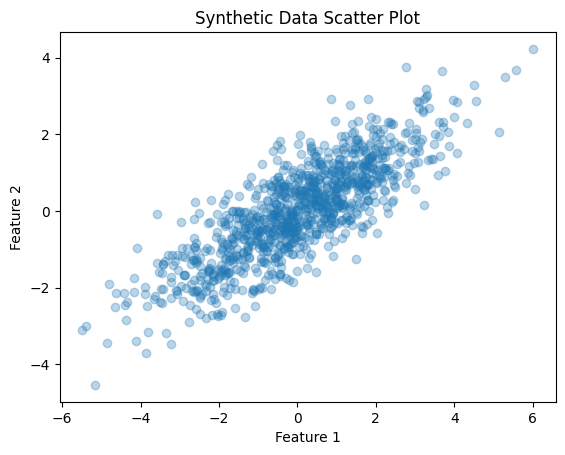

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data based on factor analysis model
def generate_synthetic_data(n_samples, n_features, n_factors):
    """
    Generates synthetic data based on a factor analysis model.
    :param n_samples: Number of data samples to generate
    :param n_features: Number of observed variables (features)
    :param n_factors: Number of latent factors
    :return: Tuple of (data, true_loadings, true_psi)
    """
    # Generate random factor loading matrix (d x k)
    loadings = np.random.randn(n_features, n_factors)

    # Generate random latent factors (n_samples x k)
    latent_factors = np.random.randn(n_samples, n_factors)

    # Generate diagonal noise covariance matrix (Psi)
    noise_variance = np.random.rand(n_features)
    psi = np.diag(noise_variance)

    # Generate observed data X = F @ L.T + Noise
    noise = np.random.multivariate_normal(np.zeros(n_features), psi, size=n_samples)
    data = latent_factors @ loadings.T + noise

    return data, loadings, psi

# E-step: Estimate expected value of latent factors and their second moments
def e_step(data, loadings, psi_inv):
    """
    E-step of the EM algorithm.
    :param data: Observed data
    :param loadings: Current estimate of factor loadings matrix
    :param psi_inv: Inverse of the noise covariance matrix
    :return: Tuple of (expected latent factors, second moments of latent factors)
    """
    n_samples, n_features = data.shape
    n_factors = loadings.shape[1]

    # Covariance of factors conditioned on data
    sigma_f = np.linalg.inv(np.eye(n_factors) + loadings.T @ psi_inv @ loadings)

    # Expected value of the latent factors (E[f | x])
    expected_factors = data @ psi_inv @ loadings @ sigma_f

    # Expected second moments (E[ff.T | x])
    expected_factors_sq = n_samples * sigma_f + expected_factors.T @ expected_factors

    return expected_factors, expected_factors_sq

# M-step: Update factor loadings and noise covariance
def m_step(data, expected_factors, expected_factors_sq):
    """
    M-step of the EM algorithm.
    :param data: Observed data
    :param expected_factors: Expected latent factors from E-step
    :param expected_factors_sq: Expected second moments from E-step
    :return: Updated factor loadings and noise covariance matrix
    """
    n_samples, n_features = data.shape
    n_factors = expected_factors.shape[1]

    # Update factor loadings matrix (L_new)
    loadings = np.linalg.solve(expected_factors_sq, expected_factors.T @ data).T

    # Update diagonal noise covariance matrix (Psi_new)
    psi_diag = np.mean((data - expected_factors @ loadings.T) ** 2, axis=0)
    psi = np.diag(psi_diag)

    return loadings, psi

# EM algorithm for Factor Analysis
def factor_analysis_em(data, n_factors, max_iter=100, tol=1e-6):
    """
    Expectation-Maximization algorithm for factor analysis.
    :param data: Observed data matrix
    :param n_factors: Number of latent factors
    :param max_iter: Maximum number of iterations
    :param tol: Convergence tolerance
    :return: Estimated factor loadings and noise covariance matrix
    """
    n_samples, n_features = data.shape

    # Initialize factor loadings randomly and diagonal noise covariance
    loadings = np.random.randn(n_features, n_factors)
    psi = np.diag(np.random.rand(n_features))

    for i in range(max_iter):
        psi_inv = np.linalg.inv(psi)

        # E-step: Estimate expected latent factors and their second moments
        expected_factors, expected_factors_sq = e_step(data, loadings, psi_inv)

        # M-step: Update factor loadings and noise covariance
        new_loadings, new_psi = m_step(data, expected_factors, expected_factors_sq)

        # Check for convergence
        if np.linalg.norm(loadings - new_loadings) < tol and np.linalg.norm(psi - new_psi) < tol:
            print(f"Converged after {i+1} iterations.")
            break

        loadings, psi = new_loadings, new_psi

    return loadings, psi

# Parameters for synthetic data
n_samples = 1000  # Number of samples
n_features = 10   # Number of observed variables (features)
n_factors = 3     # Number of latent factors

# Generate synthetic data
data, true_loadings, true_psi = generate_synthetic_data(n_samples, n_features, n_factors)

# Apply the EM algorithm to estimate the parameters
estimated_loadings, estimated_psi = factor_analysis_em(data, n_factors)

# Output estimated parameters and true parameters
print("True Loadings Matrix:")
print(true_loadings)

print("\nEstimated Loadings Matrix:")
print(estimated_loadings)

print("\nTrue Noise Covariance Matrix (Diagonal):")
print(np.diag(true_psi))

print("\nEstimated Noise Covariance Matrix (Diagonal):")
print(np.diag(estimated_psi))

# Visualize the data
plt.scatter(data[:, 0], data[:, 1], alpha=0.3)
plt.title('Synthetic Data Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()